# protostars
## 08- `Star_BB.py` experiment 4
### III. Run01

Re-run `Starfish` with the `Star_BB.py` code with the solid angle adjustment.

**Just the CO region**

In [1]:
import pandas as pd

In [2]:
ws = np.load("../sf/exp4/output/bb_absolute/run01/emcee_chain.npy")

In [4]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [5]:
from matplotlib.ticker import MaxNLocator

In [6]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", r"$[\mathrm{Fe}/\mathrm{H}]$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{BB}}$", r"$\log{\Omega_2}$", r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

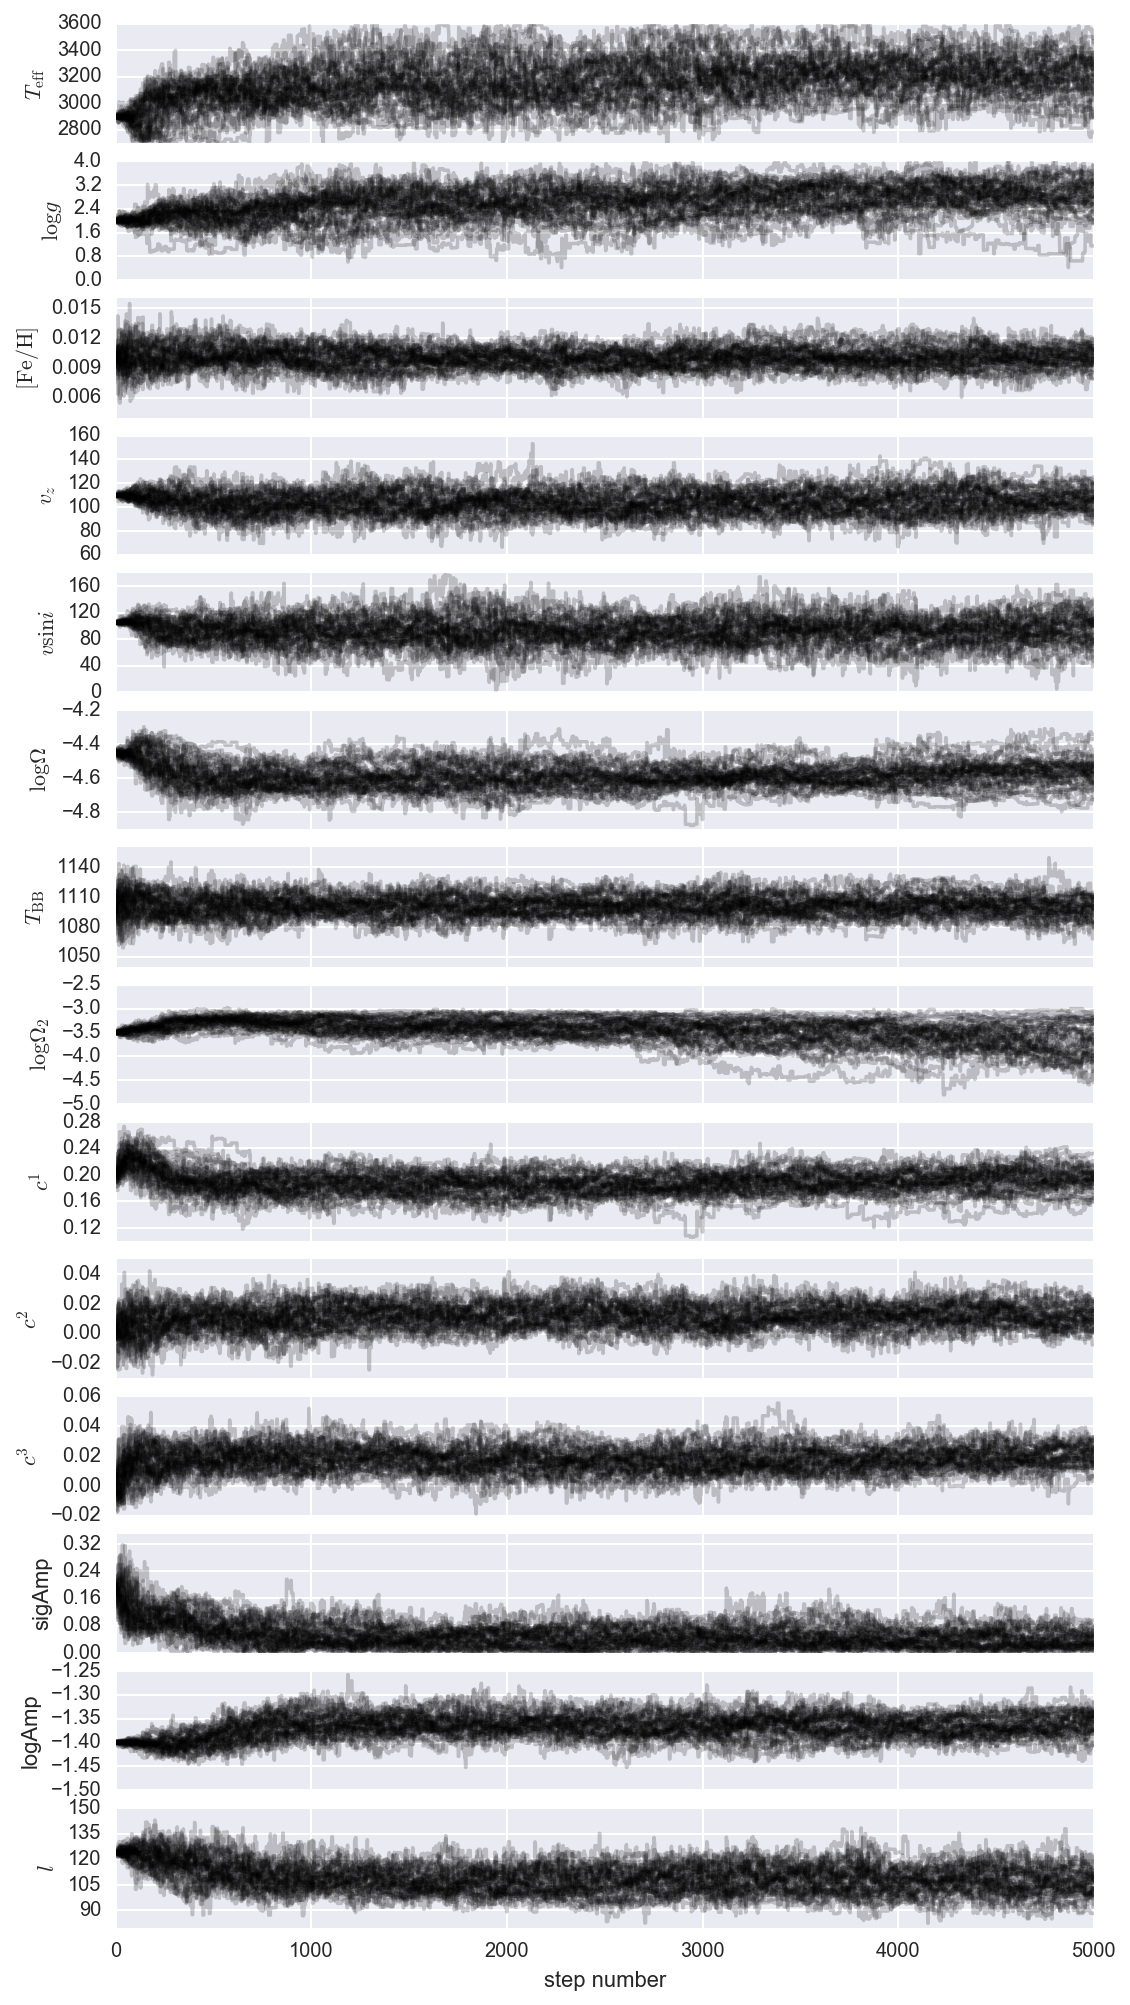

In [7]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

In [8]:
np_labs = np.array(label)
np_labs[0:8]

array(['$T_{\\mathrm{eff}}$', '$\\log{g}$', '$[\\mathrm{Fe}/\\mathrm{H}]$',
       '$v_z$', '$v\\sin{i}$', '$\\log{\\Omega}$', '$T_{\\mathrm{BB}}$',
       '$\\log{\\Omega_2}$'], 
      dtype='<U26')

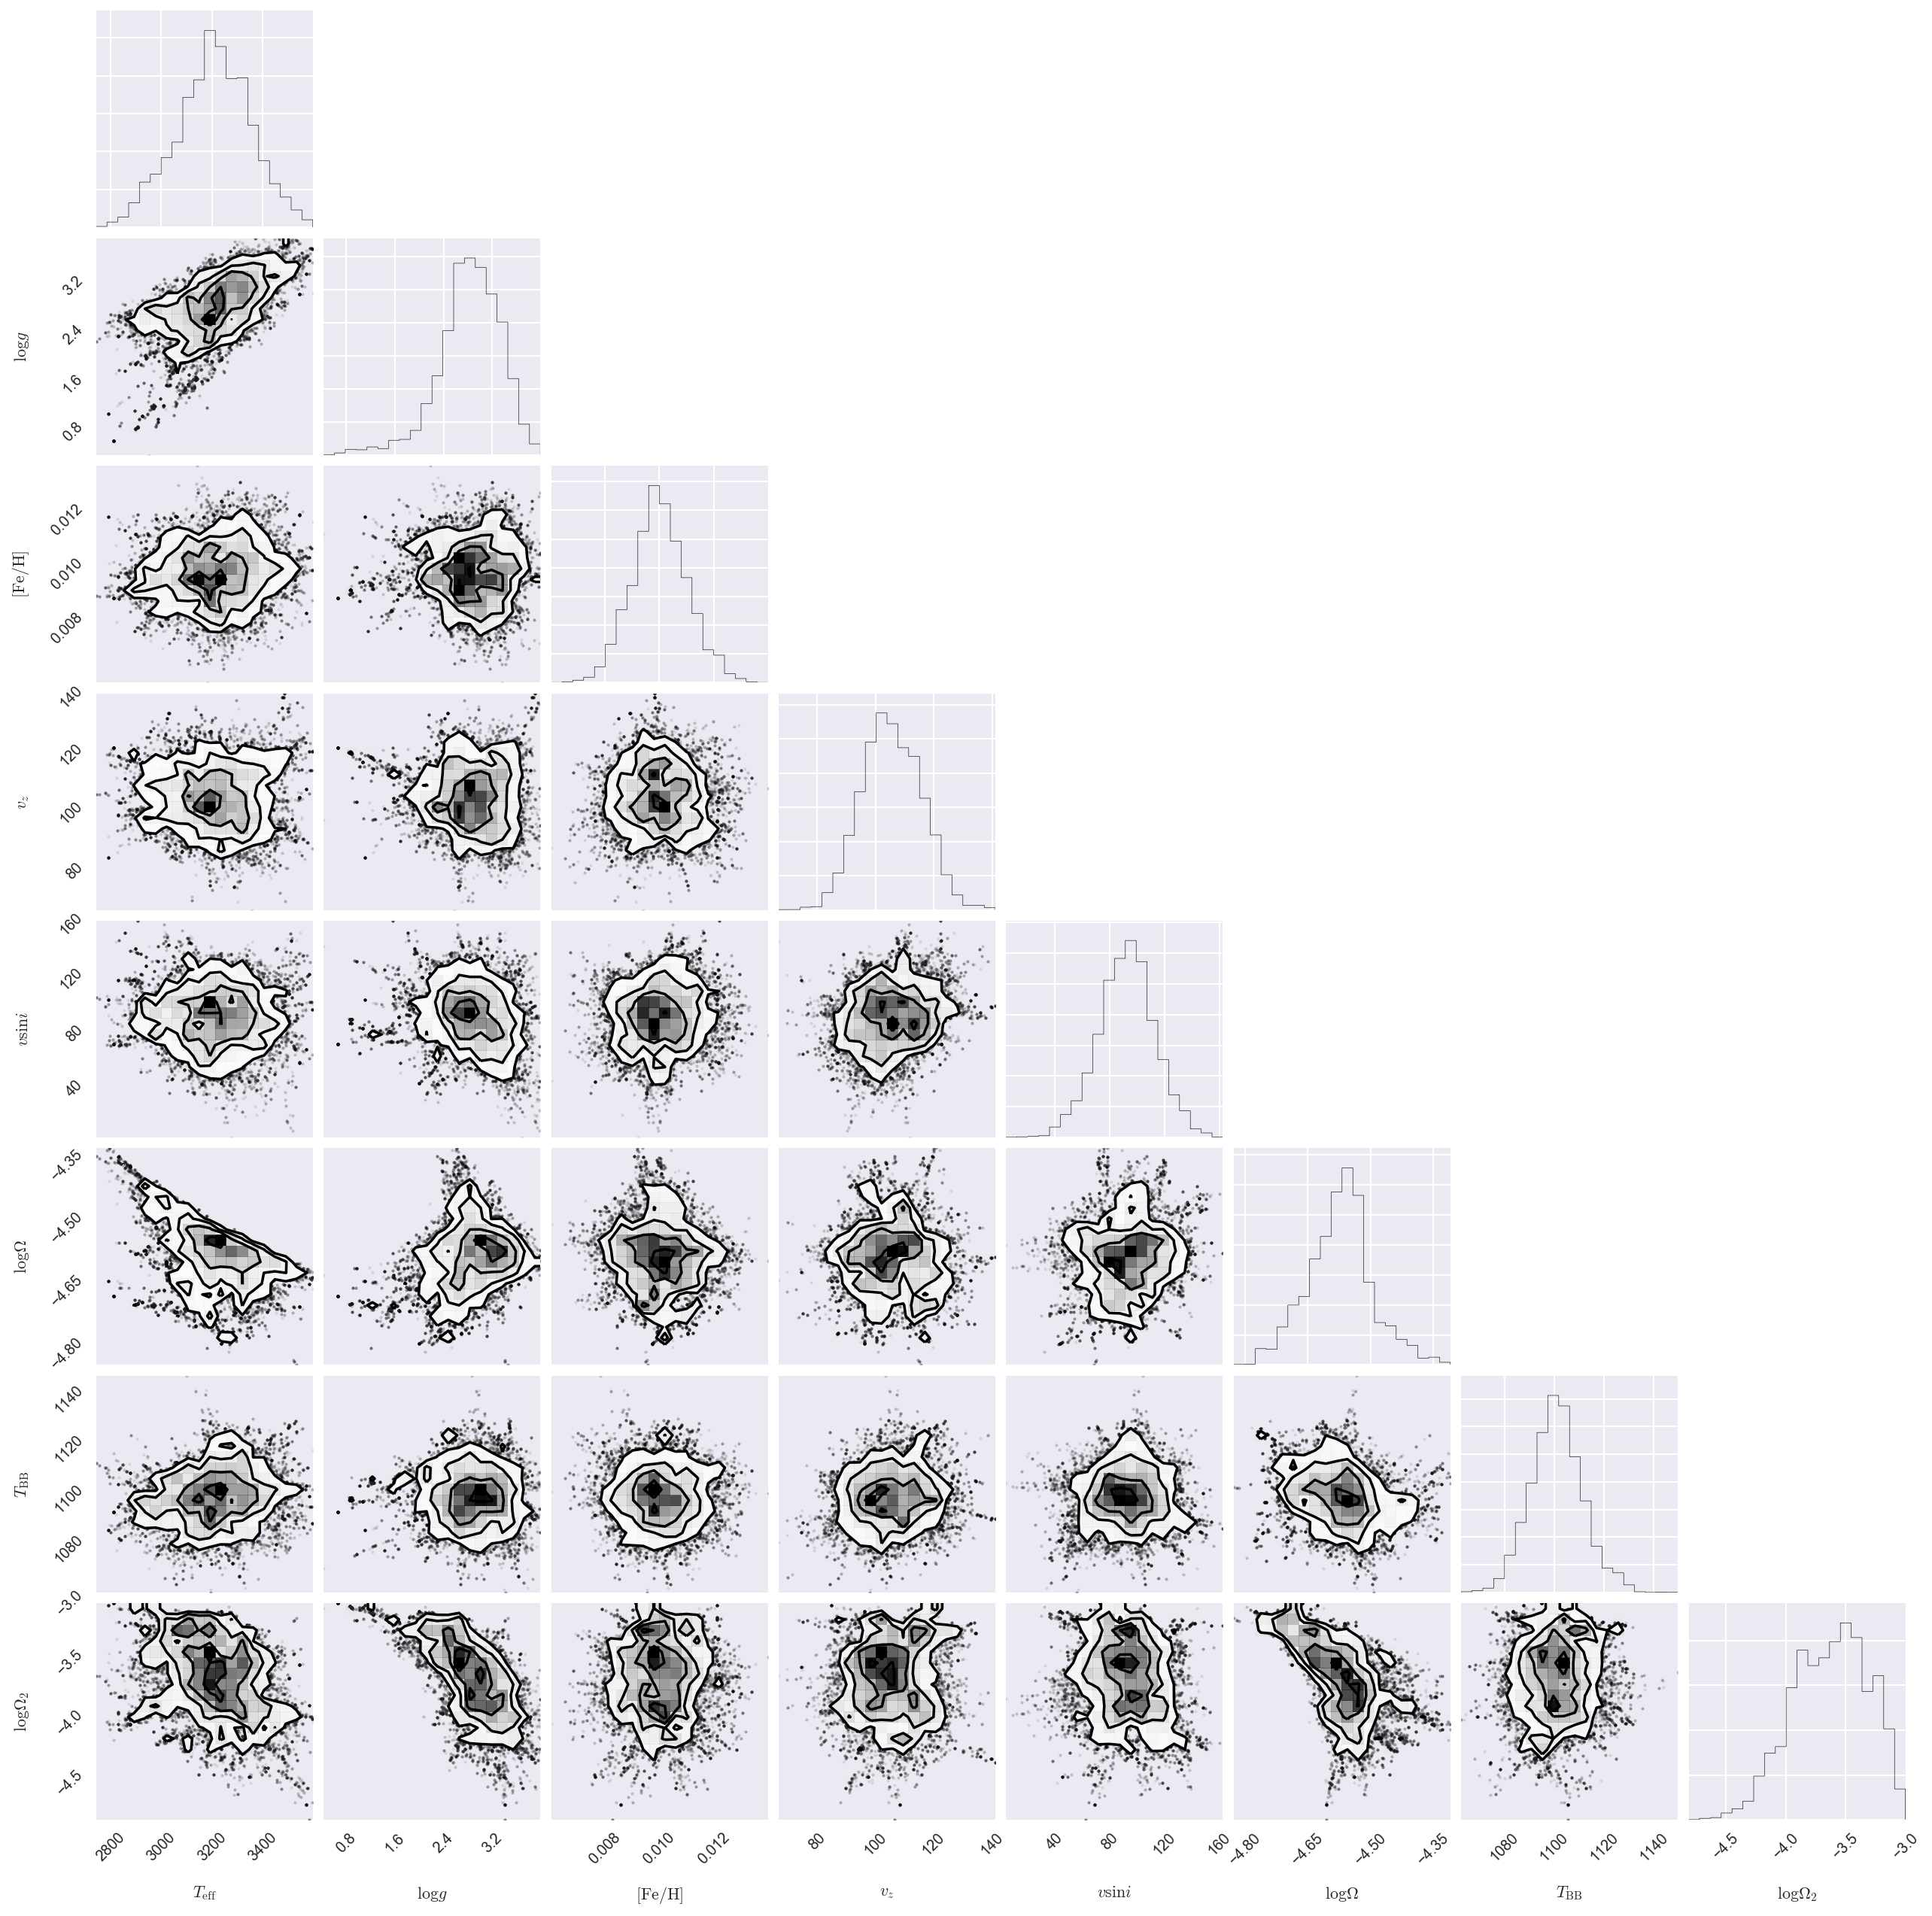

In [10]:
import corner
fig = corner.corner(fc[:, 0:8], labels=np_labs[0:8])
fig.savefig('../plots/exp4_run01_corner.png', dpi=300)

## Spectroscopy

In [11]:
import h5py

name_out = 'S68N_NIRSPEC_CO.hdf5'
f = h5py.File("../data/reduced/"+name_out, "r")

wl = np.array(f['wls'])
fl = np.array(f['fls'])

f.close()

In [12]:
raw_mods = np.load('../sf/exp4/output/bb_absolute/run01/temp_raw_models.npy', mmap_mode='r')

In [13]:
raw_mods.shape

(5000, 40, 4, 258)

In [14]:
i=4990
star, disk, cheb, flux_mean = raw_mods[i,0,0,:], raw_mods[i,0,1,:], raw_mods[i,0,2,:], raw_mods[i,0,3,:]

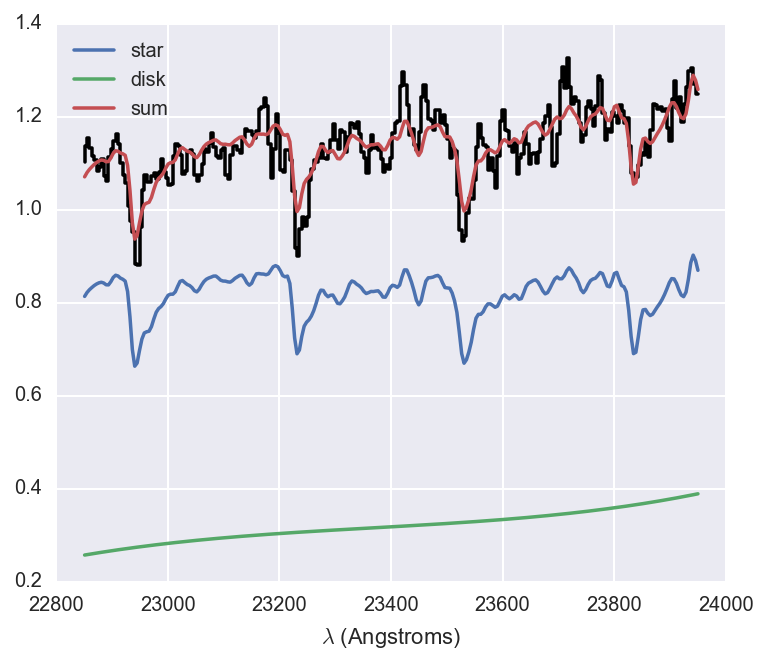

In [15]:
plt.figure(figsize=(6, 5))
plt.step(wl, fl, 'k')
plt.plot(wl, star, label = 'star')
plt.plot(wl, disk, label = 'disk')
plt.plot(wl, star+disk, label = 'sum')
plt.xlabel('$\lambda$ (Angstroms)')
#plt.ylim(0,1.6)
plt.legend(loc='best')

## Veiling factor

/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


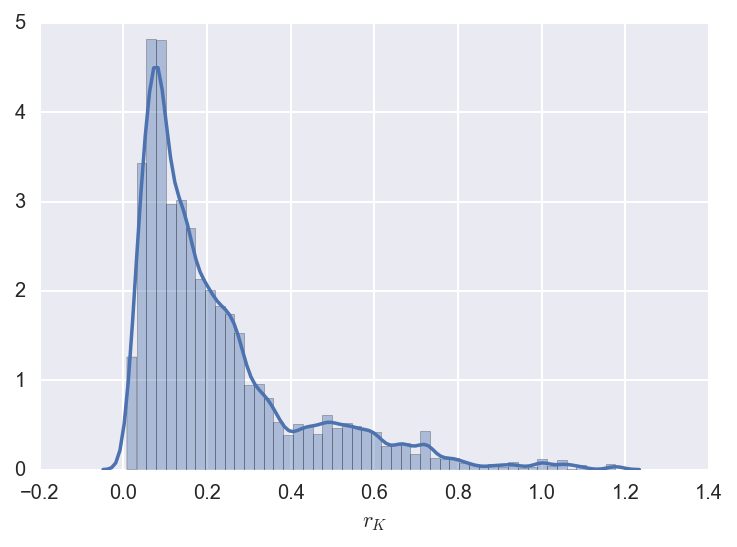

In [16]:
r_K_all = np.median(raw_mods[-1000:,:,1,:]/raw_mods[-1000:,:,0,:], axis=2)
r_K_all_flat = r_K_all.reshape(1000*40)

sns.distplot(r_K_all_flat)
plt.xlabel('$r_K$')

## Solid angle ratio

Compute the ratio of solid angles of disk to star:  
## $\frac{\Omega_d}{\Omega_\star} = \frac{r_d^2 d^2}{r_\star^2 d^2} = \frac{r_d^2}{r_\star^2}$

In [17]:
om_ratio = 10**fc[:, 7]/10**fc[:, 5]

In [18]:
sns.set_context('paper',font_scale=1.8)

In [19]:
sns.set_style('ticks')

/anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


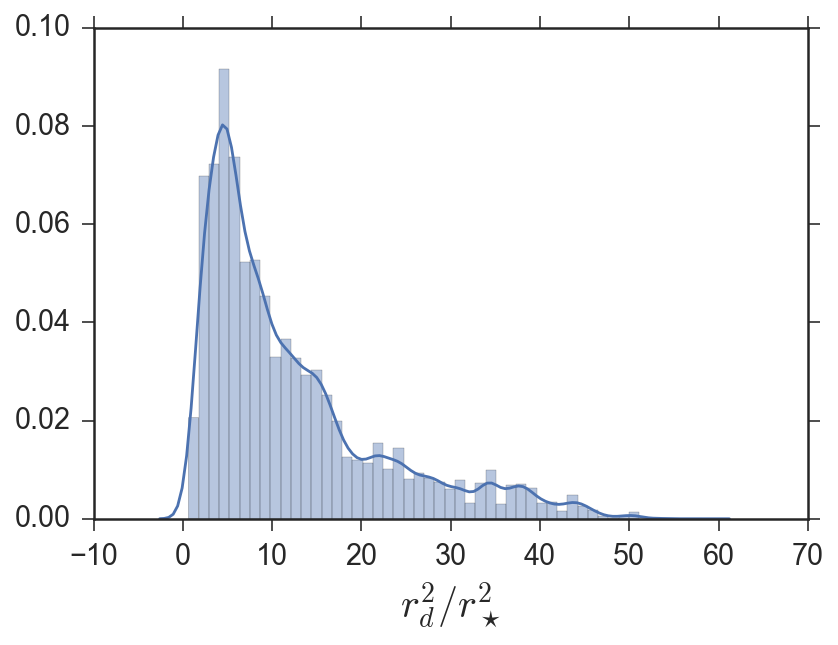

In [20]:
sns.distplot(om_ratio)
plt.xlabel(r'$r_d^2/r_\star^2$', fontsize=20)

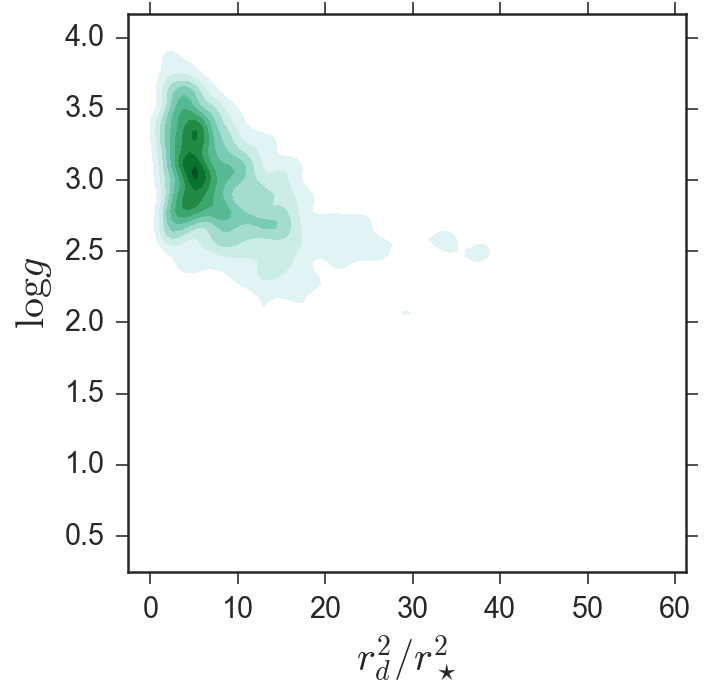

In [21]:
plt.figure(figsize=(5,5))
sns.kdeplot(om_ratio, fc[:,1], shade=True, shade_lowest=False)
plt.xlabel(r'$r_d^2/r_\star^2$', fontsize=20)
plt.ylabel(r'$\log{g}$', fontsize=20)
plt.savefig('../plots/logg_omega_exp4r01.pdf', bbox_inches='tight')

$g = GM/r_\star^2$

In [22]:
import astropy.units as u

In [23]:
import astropy.constants as C

In [24]:
rs = np.arange(1.0, 10.0, 0.1)*u.R_sun

y_vals = (C.G*0.5*u.M_sun/(1.0*rs)**2).to(u.cm/u.s**2).value
x_vals_raw = (0.01*u.AU)**2/((1.0*rs)**2)
x_vals = x_vals_raw.to(u.dimensionless_unscaled)

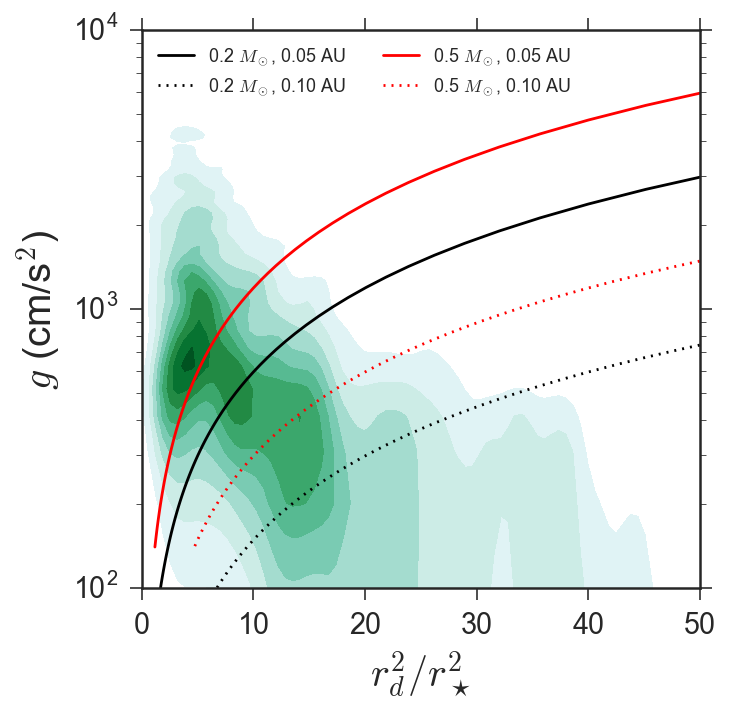

In [25]:
plt.figure(figsize=(5,5))
sns.kdeplot(om_ratio, 10**fc[:,1], shade=True, shade_lowest=False)
plt.xlabel(r'$r_d^2/r_\star^2$', fontsize=20)
plt.ylabel(r'$g$ (cm/s$^2$)', fontsize=20)
plt.yscale('log')
plt.ylim(10**2.0, 10**4.0)
plt.xlim(0.0, 50.0)

convs = {(0,0):'k-',
         (0,1):'k:',
         (1,0):'r-',
         (1,1):'r:'}

for i, ms in enumerate([0.25, 0.5]):
    for j, r_d in enumerate([0.05, 0.10]):
        y_vals = (C.G*1.0*ms*u.M_sun/(1.0*rs)**2).to(u.cm/u.s**2).value
        x_vals_raw = (r_d*u.AU)**2/((1.0*rs)**2)
        x_vals = x_vals_raw.to(u.dimensionless_unscaled)
        plt.plot(x_vals, y_vals, convs[(i,j)],
                 label="{:.1f} $M_\odot$, {:.2f} AU".format(ms, r_d))
        
plt.legend(loc='best', ncol=2, fontsize=9)
plt.savefig('../plots/logg_omega_phys_exp4r01.pdf', bbox_inches='tight')

## The end.